In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'D:/dl/archive (1)/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.12735434 0.14696218 0.12079054]
  [0.14027263 0.15988047 0.13306291]
  [0.15287876 0.1724866  0.14503562]
  ...
  [0.17921995 0.11255327 0.08118072]
  [0.18308794 0.11642128 0.08504874]
  [0.18431373 0.11764707 0.08627451]]

 [[0.06347776 0.0830856  0.05955619]
  [0.069291   0.08889884 0.06536943]
  [0.07583074 0.09543858 0.07184312]
  ...
  [0.17986585 0.11319919 0.08182663]
  [0.18373387 0.1170672  0.08569464]
  [0.18431373 0.11764707 0.08627451]]

 [[0.07789906 0.0975069  0.07397749]
  [0.05658388 0.07619173 0.05266231]
  [0.04029214 0.05989999 0.03637057]
  ...
  [0.18051177 0.1138451  0.08247255]
  [0.18431373 0.11764707 0.08627451]
  [0.18431373 0.11764707 0.08627451]]

 ...

 [[0.8119646  0.7021606  0.65902334]
  [0.8927307  0.7867823  0.7513561 ]
  [0.84089017 0.7350078  0.6997137 ]
  ...
  [0.8020079  0.62981766 0.5858432 ]
  [0.78550076 0.61821485 0.5756039 ]
  [0.7628938  0.602067   0.5601019 ]]

 [[0.82506675 0.71589625 0.67402583]
  [0.88599956 0.7801172  0.74482304]


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'D:/dl/archive (1)/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [7]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7254902  0.72156864 0.7137255 ]
  [0.7254902  0.72156864 0.7137255 ]
  [0.72650284 0.72258127 0.71473813]
  ...
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]]

 [[0.7254902  0.72156864 0.7137255 ]
  [0.7254902  0.72156864 0.7137255 ]
  [0.7262479  0.72232634 0.7144832 ]
  ...
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]]

 [[0.7254902  0.72156864 0.7137255 ]
  [0.7254902  0.72156864 0.7137255 ]
  [0.7259929  0.72207135 0.7142282 ]
  ...
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]
  [0.80392164 0.8078432  0.81568635]]

 ...

 [[0.7048698  0.6460463  0.6342816 ]
  [0.70512474 0.6463012  0.6345365 ]
  [0.70537966 0.64655614 0.63479143]
  ...
  [0.08547147 0.08547147 0.08547147]
  [0.67442447 0.67442447 0.67442447]
  [0.8254275  0.8220252  0.81522065]]

 [[0.7087831  0.6528602  0.6410955 ]
  [0.709038   0.65337014 0.64160544]


In [8]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 33s 310ms/step - loss: 0.6299 - accuracy: 0.7718 - val_loss: 0.9152 - val_accuracy: 0.6962
Epoch 2/50
105/105 [==============================] - 32s 306ms/step - loss: 0.6177 - accuracy: 0.7709 - val_loss: 0.9063 - val_accuracy: 0.6999
Epoch 3/50
105/105 [==============================] - 32s 304ms/step - loss: 0.5526 - accuracy: 0.8013 - val_loss: 0.8919 - val_accuracy: 0.7134
Epoch 4/50
105/105 [==============================] - 32s 306ms/step - loss: 0.5635 - accuracy: 0.7846 - val_loss: 0.8501 - val_accuracy: 0.7306
Epoch 5/50
105/105 [==============================] - 32s 304ms/step - loss: 0.5495 - accuracy: 0.8031 - val_loss: 0.9533 - val_accuracy: 0.7073
Epoch 6/50
105/105 [==============================] - 32s 307ms/step - loss: 0.5287 - accuracy: 0.7995 - val_loss: 0.9347 - val_accuracy: 0.7048
Epoch 7/50
105/105 [==============================] - 32s 305ms/step - loss: 0.5020 - accuracy: 0.8150 - val_loss: 0.9346 - val_ac

In [14]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 3s 131ms/step - loss: 1.1389 - accuracy: 0.7269


In [15]:
scores

[1.138904094696045, 0.7269372940063477]

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

50

In [19]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6298515796661377,
 0.6176763772964478,
 0.552612841129303,
 0.5635125637054443,
 0.5494518280029297]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

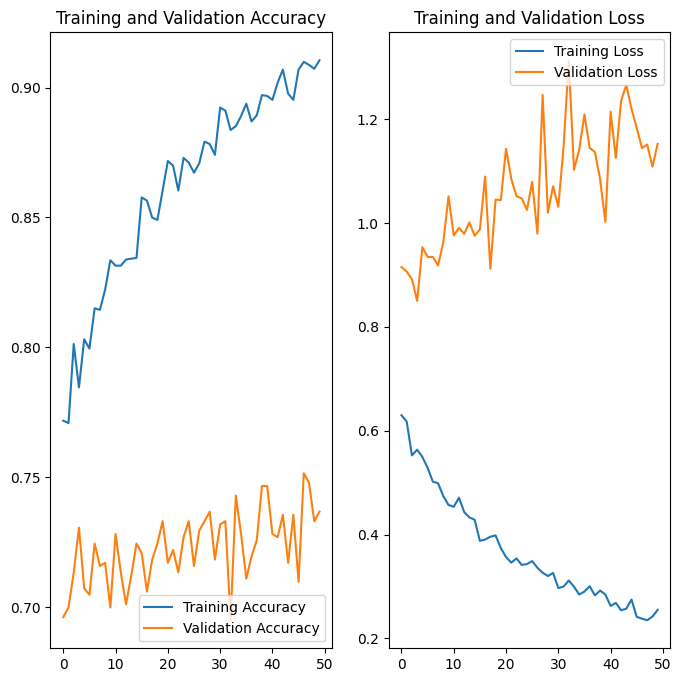

In [27]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


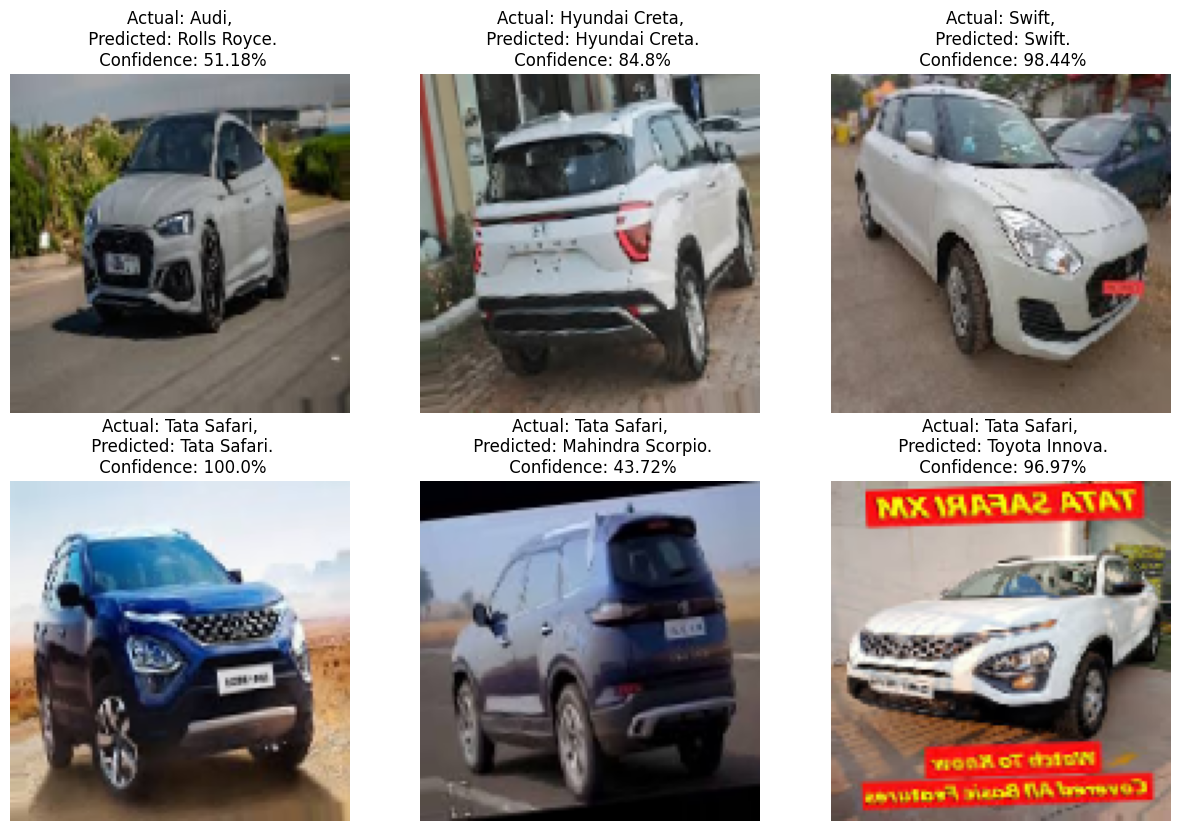

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert() 

with open('./car_model2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpenzkfysy\assets


INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpenzkfysy\assets
